# Plotting battery voltage and temperature time series

### Readout the data from sqlite to a pandas dataframe

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("denseML_0006_20220531_2103.sqlite3")

df = pd.read_sql_query("""select tv.timestamp as timestamp, voltage, temperature
                          from  ts_voltage as tv, ts_temperature as tt
                          where tv.timestamp == tt.timestamp""", con)
con.close()

### Convert timestamp string to pandas format

In [29]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

### Verify that result of SQL query is stored in the dataframe

In [30]:
print(df.head())

            timestamp  voltage  temperature
0 2022-05-18 16:00:00     1.53           28
1 2022-05-18 17:00:00     1.53           24
2 2022-05-18 18:00:00     1.52           23
3 2022-05-18 19:00:00     1.52           23
4 2022-05-18 20:00:00     1.51           22


### Do the plotting

(0.9, 1.6)

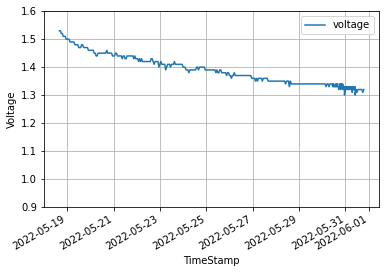

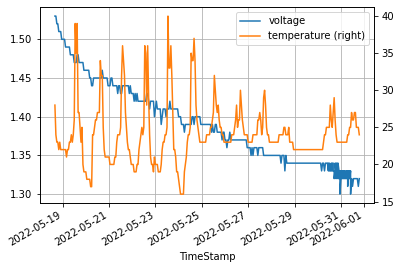

In [31]:
ax1 = df.plot(x='timestamp', y='voltage', grid=True, xlabel='TimeStamp', ylabel='Voltage')
ax2 = df.plot(x='timestamp', secondary_y='temperature', grid=True, xlabel='TimeStamp')

ax1.set_ylim(0.9, 1.6)